In [1]:
!date

Fri Dec  4 17:00:55 PST 2020


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis

import anndata

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

def nd(arr):
    return np.asarray(arr).reshape(-1)

import sys

sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [4]:
mfish = anndata.read_h5ad("../../data/notebook/revision/merfish-updated.h5ad")

/home/sina/bin/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [10]:
le = LabelEncoder()
mfish.obs["subclass_id"] = le.fit_transform(mfish.obs.subclass.values)

In [5]:
mfish

AnnData object with n_obs × n_vars = 280327 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id'
    var: 'n_iso'
    layers: 'X', 'log1p', 'norm'

In [7]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [14]:

num_TSNE = 2
state = 42
metric = "euclidean"
n_neighbors = 30
num_PCA = 50
num_NCA = 10

In [ ]:
X = mfish.X

tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
mfish.obsm["X_tsne"] = tsne.fit_transform(X)

In [116]:
mfish.write_h5ad("../../data/notebook/revision/merfish-updated_tsne.h5ad")

In [19]:
mfish

AnnData object with n_obs × n_vars = 280327 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id', 'subclass_id'
    var: 'n_iso'
    obsm: 'X_tsne'
    layers: 'X', 'log1p', 'norm'

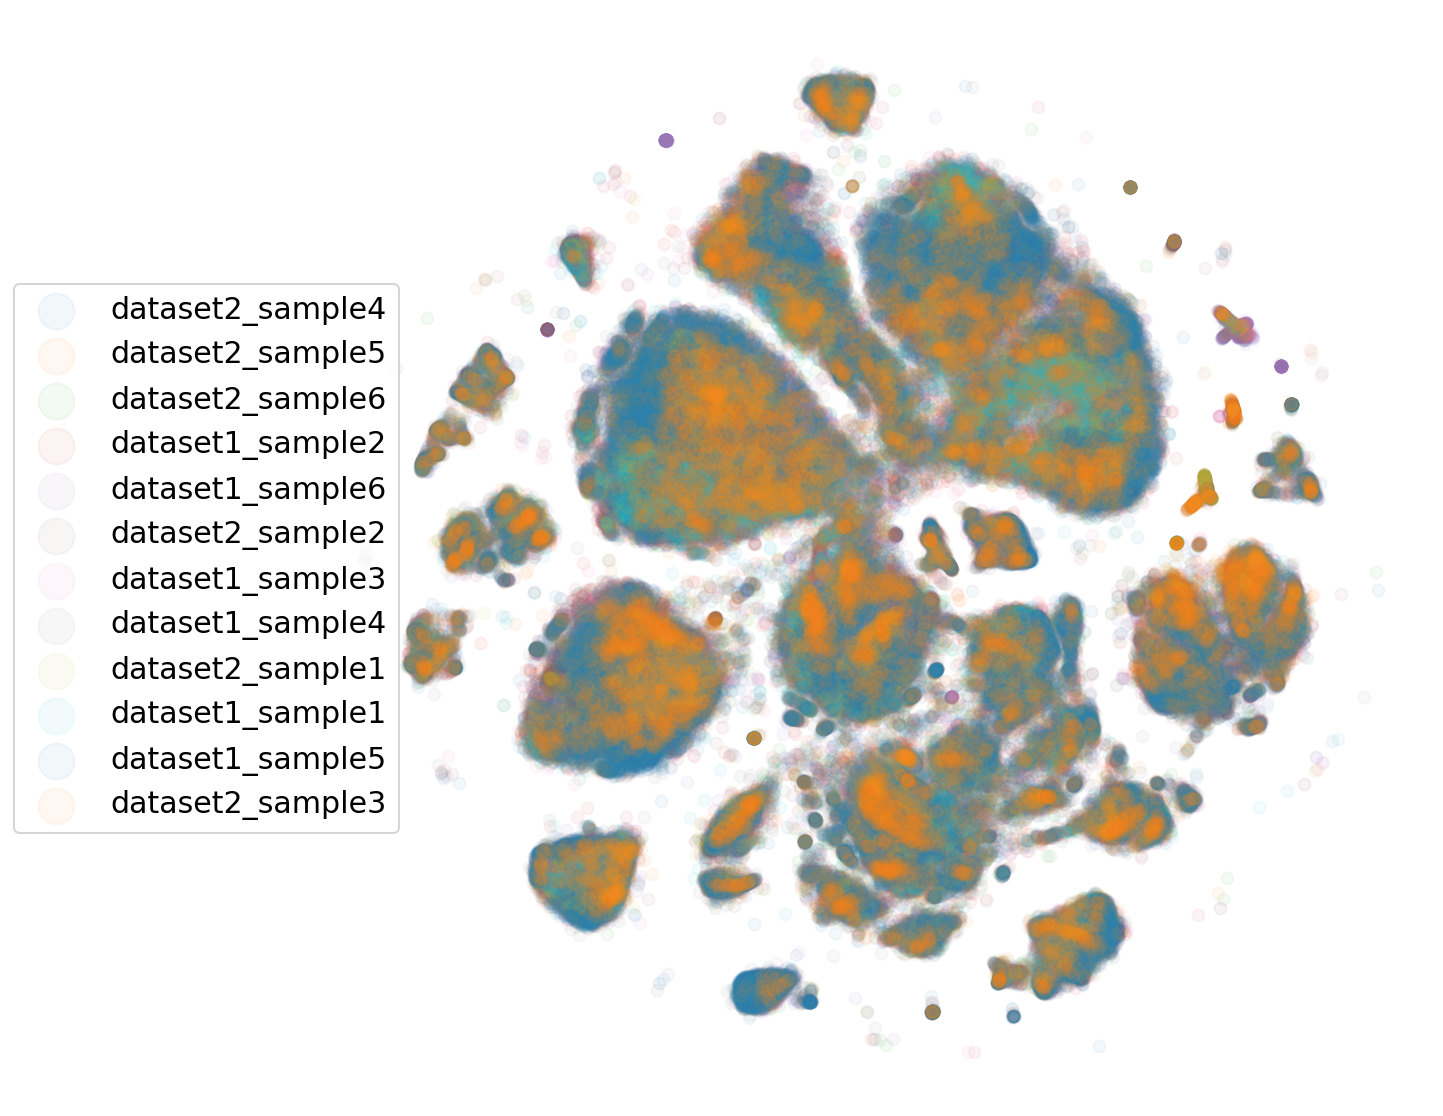

In [108]:
fig, ax = plt.subplots(figsize=(10,10))

X = mfish.obsm["X_tsne"]
for d in mfish.obs["sample_id"].unique():
    mask = mfish.obs.eval(f"sample_id == '{d}'").values
    x = X[:,0][mask]
    y = X[:,1][mask]

    ax.scatter(x,y, label=f"{d}", alpha=0.05)

ax.set_axis_off()
ax.legend(bbox_to_anchor=(0.09, 0.5), loc="center right", markerscale=3)
plt.savefig(trackfig("../../figures/sample_merfish_gene_tsne.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)

fig.show()

In [97]:
df = (mfish.obs.groupby("subclass")["sample_id"].value_counts()/mfish.obs.groupby("subclass")["sample_id"].count()).unstack().fillna(0)
labels = df.index.values
categories = df.columns.values
data = df.values.T.copy()

In [98]:
data.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

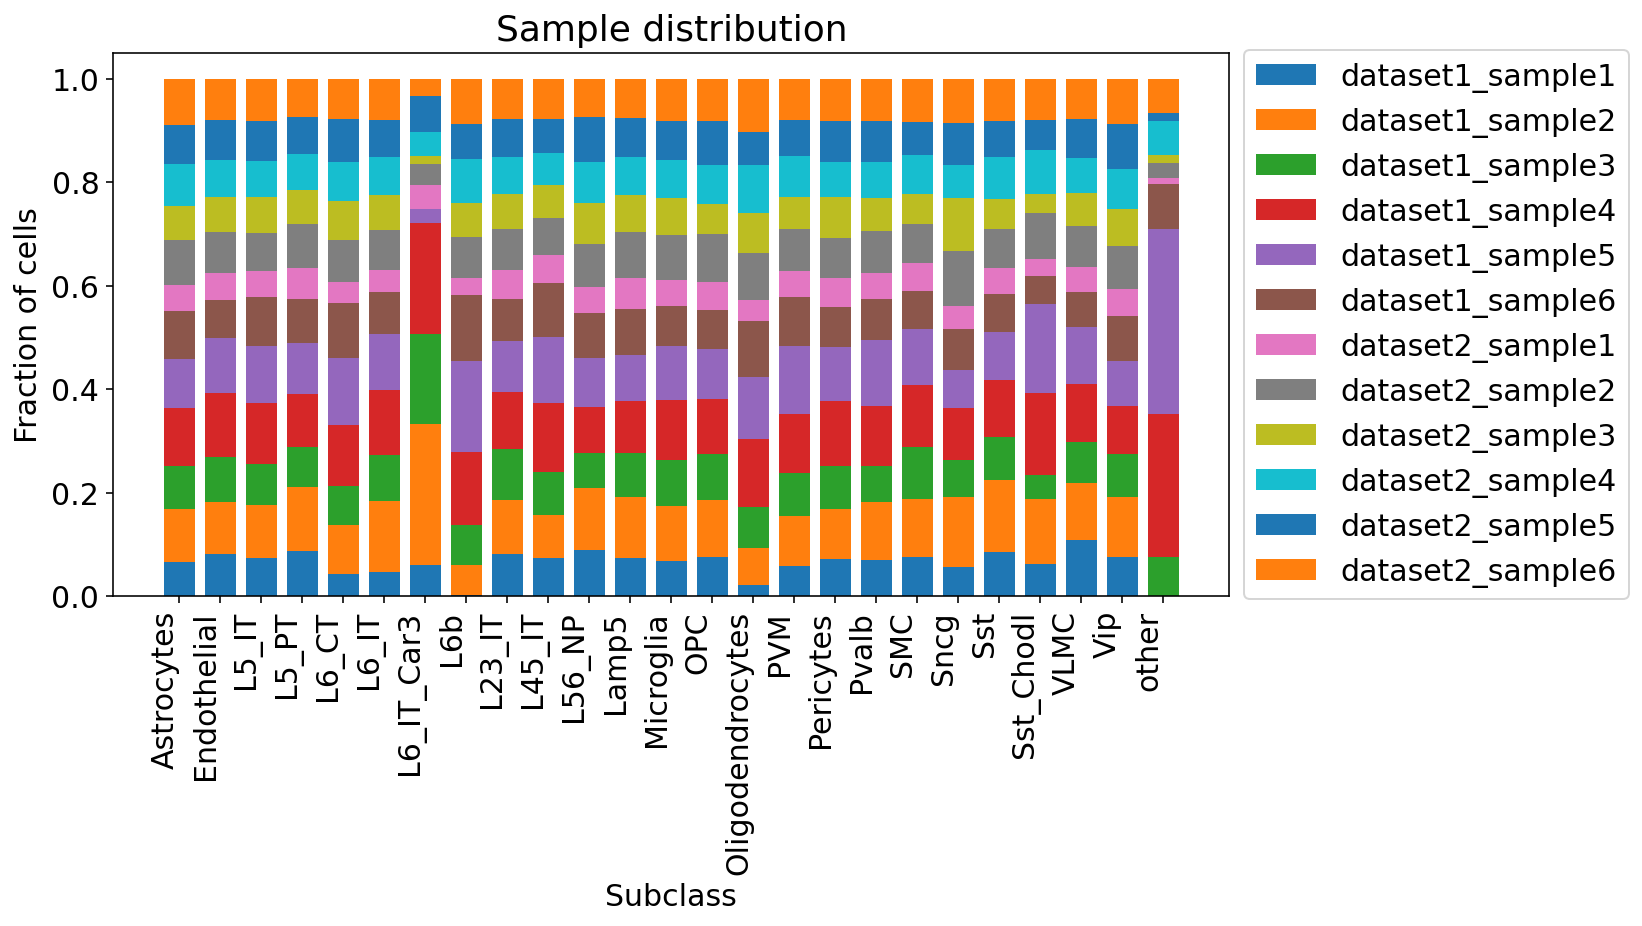

In [99]:
fig, ax = plt.subplots(figsize=(10,5))


width = 0.75

cs = data[0]
ax.bar(labels, cs, width, label=f"{categories[0]}")


for idx, d in enumerate(data[1:], 1):
    ax.bar(labels, d, width, bottom=cs, label=f"{categories[idx]}")
    cs = cs + d

ax.set_xticklabels(labels, rotation = 90, ha="right")
ax.legend(bbox_to_anchor=(1, 0.5), loc="center left")

ax.set(**{
    "title": "Sample distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Subclass"
})

plt.savefig(trackfig("../../figures/merfish_subclass_sample_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [100]:
df = (mfish.obs.groupby("label")["sample_id"].value_counts()/mfish.obs.groupby("label")["sample_id"].count()).unstack().fillna(0)
labels = df.index.values
categories = df.columns.values
data = df.values.T.copy()

In [101]:
data.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

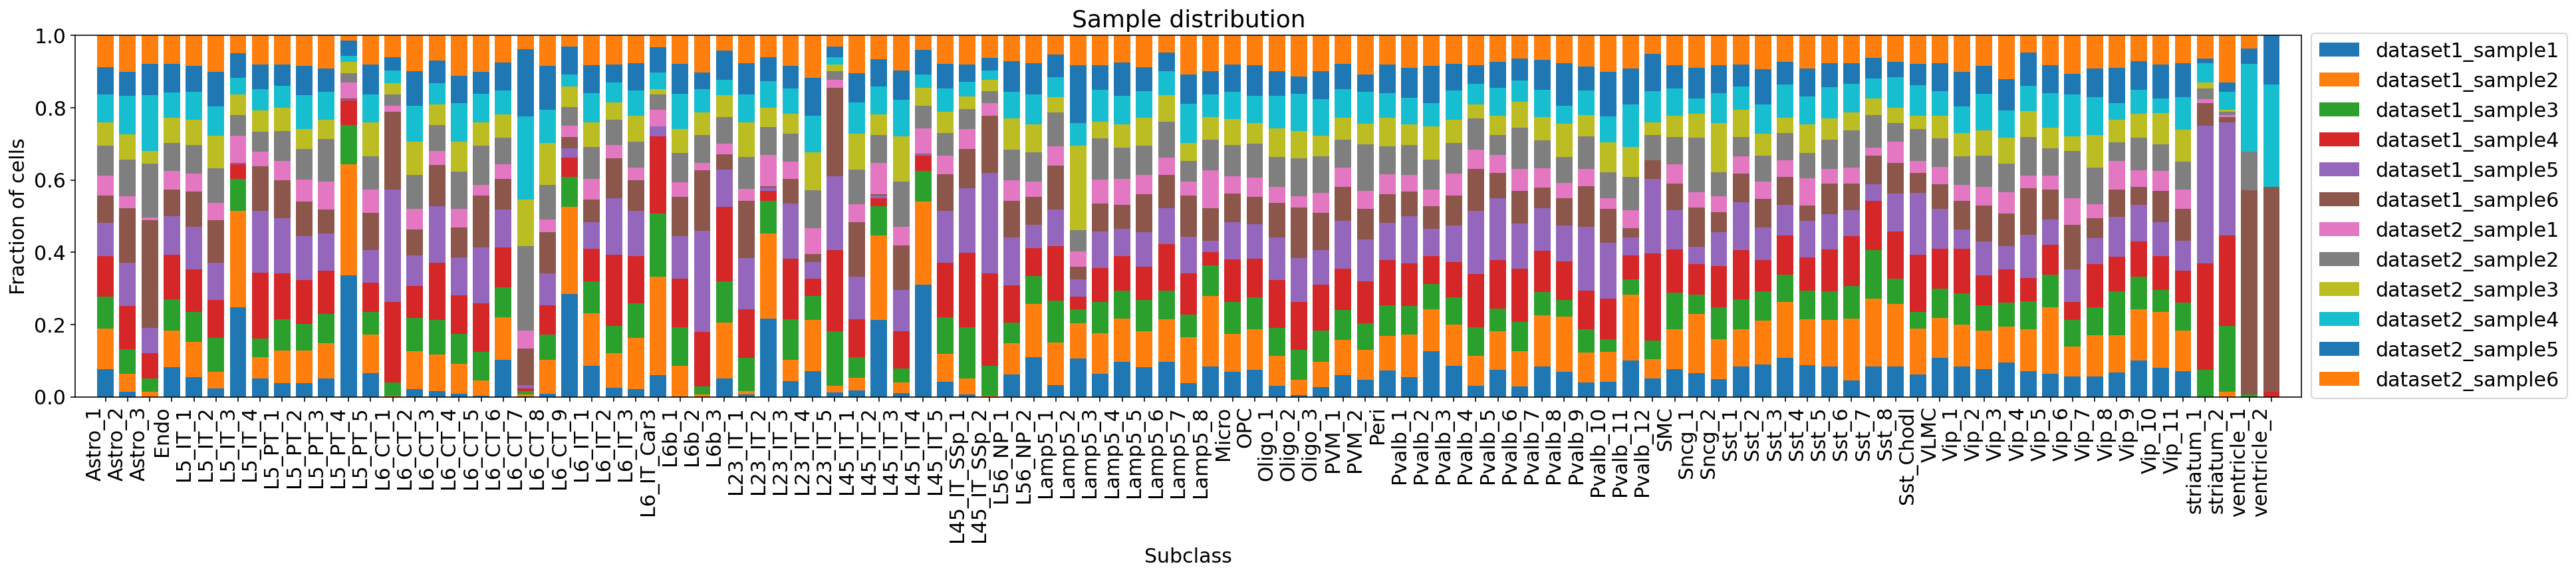

In [103]:
fig, ax = plt.subplots(figsize=(30,5))


width = 0.75

cs = data[0]
ax.bar(labels, cs, width, label=f"{categories[0]}")


for idx, d in enumerate(data[1:], 1):
    ax.bar(labels, d, width, bottom=cs, label=f"{categories[idx]}")
    cs = cs + d

ax.set_xticklabels(labels, rotation = 90, ha="right")
ax.legend(bbox_to_anchor=(1, 0.5), loc="center left")

ax.set(**{
    "title": "Sample distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Subclass"
})
ax.margins(x=0.01)

plt.savefig(trackfig("../../figures/merfish_cluster_sample_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [115]:
df.shape

(99, 12)

In [114]:
1/df.shape[1]

0.08333333333333333

In [112]:
df.mean(axis=1).tolist()

[0.08333333333333336,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333331,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.0833333